# Autoencoder

Esse notebook utiliza o arquivo autoencoder.py, para que o explorado aqui fique o mais simples possível. Utilizaremos os novos dados.

In [1]:
from autoencoder import AutoencoderAux, Autoencoder

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

2024-09-24 14:01:16.024279: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 14:01:16.025033: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:01:16.027057: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 14:01:16.032305: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 14:01:16.040229: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

## Treinamento em Não-Ataques

In [ ]:
df = pd.read_csv("../files/5G_attack_detection_ds.csv")
df = df.dropna()

X_train, y_train, X_test, y_test = AutoencoderAux.separate_datasets(df)
autoencoder = Autoencoder(X_train.shape[1])

print(X_train.shape[1])

In [3]:
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

Epoch 1/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5760 - val_loss: 0.5252
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5266 - val_loss: 0.5306
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5216 - val_loss: 0.5193
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5122 - val_loss: 0.5128
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5146 - val_loss: 0.5134
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5174 - val_loss: 0.5108
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5076 - val_loss: 0.5089
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5089 - val_loss: 0.5081
Epoch 9/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5123 - val_loss: 0.5067
Epoch 10/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5055 - val_loss: 0.5043
Epoch 11/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5090 - val_loss: 0.5077
Epoch 12/200
152/152 ━━━━━━━━━━━━━━━━━━━━

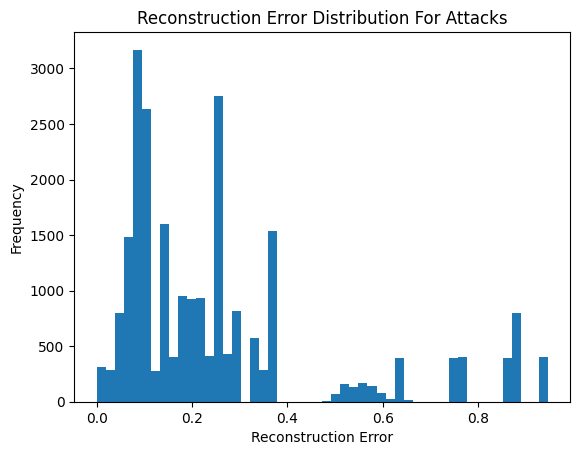

In [6]:
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution For Attacks')
plt.show()

In [7]:
X_train, y_train, X_test, y_test = AutoencoderAux.add_instances_to_testing(
    X_train, y_train, X_test, y_test
)

autoencoder = Autoencoder(X_train.shape[1])
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.5952 - val_loss: 0.5316
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5251 - val_loss: 0.5292
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5210 - val_loss: 0.5297
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5230 - val_loss: 0.5252
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5096 - val_loss: 0.5265
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5226 - val_loss: 0.5228
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5133 - val_loss: 0.5233
Epoch 8/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5125 - val_loss: 0.5191
Epoch 9/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5104 - val_loss: 0.5176
Epoch 10/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5089 - val_loss: 0.5176
Epoch 11/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5106 - val_loss: 0.5185
Epoch 12/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.

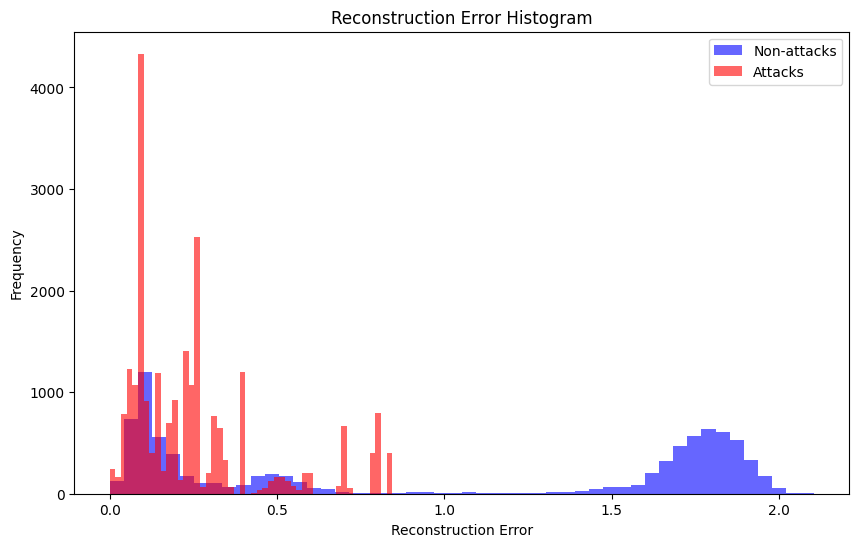

In [8]:
non_attack_errors = reconstruction_error[y_test == 1]
attack_errors = reconstruction_error[y_test == -1]

# Plot the histogram
plt.figure(figsize=(10, 6))

plt.hist(non_attack_errors, bins=50, alpha=0.6, color='blue', label='Non-attacks')
plt.hist(attack_errors, bins=50, alpha=0.6, color='red', label='Attacks')

plt.title('Reconstruction Error Histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Treinamento em Ataques

Vamos usar uma arquitetura diferente (definida pela flag normal_training=False)

In [2]:
df = pd.read_csv("../files/5G_attack_detection_ds.csv")
df = df.dropna()

X_test, y_test, X_train, y_train = AutoencoderAux.separate_datasets(df)

I0000 00:00:1727197283.398131  241546 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 14:01:23.398353: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2062 - val_loss: 0.0556
Epoch 2/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0431 - val_loss: 0.0262
Epoch 3/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0243 - val_loss: 0.0198
Epoch 4/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0190 - val_loss: 0.0179
Epoch 5/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0167 - val_loss: 0.0147
Epoch 6/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0139 - val_loss: 0.0132
Epoch 7/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126 - val_loss: 0.0121
Epoch 8/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0110 - val_loss: 0.0111
Epoch 9/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 10/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0100
Epoch 11/200
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0092 - val_loss: 0.0093
Epoch 12/200
152/152 ━━━━━━━━━━━━━━━━━━━━

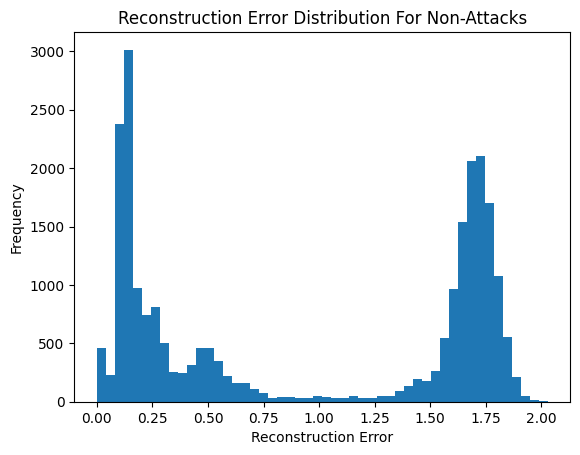

In [3]:
autoencoder = Autoencoder(X_train.shape[1], normal_training=False)
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Reconstruction Error Distribution For Non-Attacks')
plt.show()

Epoch 1/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.2319 - val_loss: 0.0647
Epoch 2/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0509 - val_loss: 0.0281
Epoch 3/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0264 - val_loss: 0.0199
Epoch 4/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0200 - val_loss: 0.0174
Epoch 5/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0174 - val_loss: 0.0152
Epoch 6/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0155 - val_loss: 0.0141
Epoch 7/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0142 - val_loss: 0.0127
Epoch 8/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126 - val_loss: 0.0116
Epoch 9/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0114 - val_loss: 0.0106
Epoch 10/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 11/200
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 12/200
121/121 ━━━━━━━━━━━━━━━━━━━━

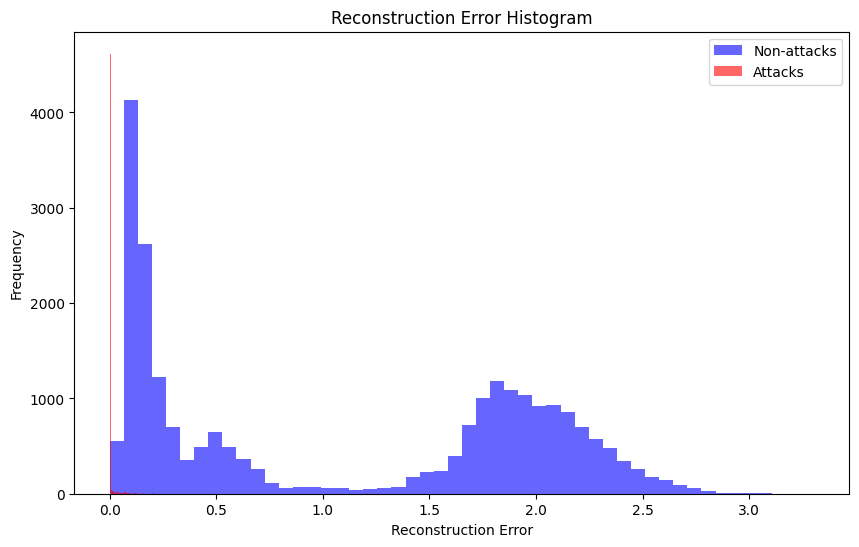

In [4]:
X_train, y_train, X_test, y_test = AutoencoderAux.add_instances_to_testing(
    X_train, y_train, X_test, y_test
)

autoencoder = Autoencoder(X_train.shape[1], normal_training=False)
autoencoder.train_model(X_train)
reconstruction_error = autoencoder.predict_and_get_reconstruction_errors(X_test)

non_attack_errors = reconstruction_error[y_test == 1]
attack_errors = reconstruction_error[y_test == -1]

# Plot the histogram
plt.figure(figsize=(10, 6))

plt.hist(non_attack_errors, bins=50, alpha=0.6, color='blue', label='Non-attacks')
plt.hist(attack_errors, bins=50, alpha=0.6, color='red', label='Attacks')

plt.title('Reconstruction Error Histogram')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Daremos zoom na parte esquerda do gráfico e delimitaremos um threshold que seleciona a maior parte dos ataques.

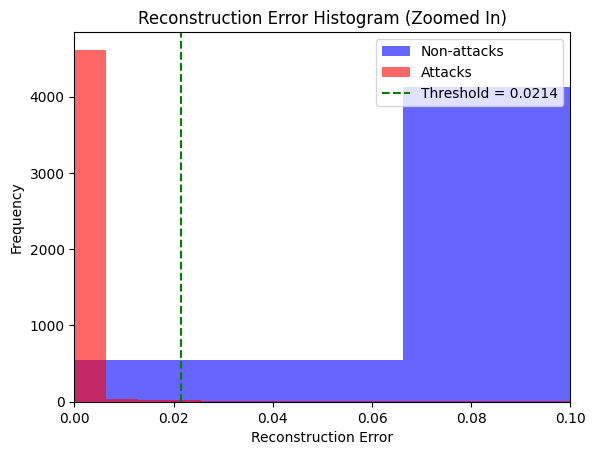

In [5]:
threshold = np.percentile(attack_errors, 97)

plt.hist(non_attack_errors, bins=50, alpha=0.6, color='blue', label='Non-attacks')
plt.hist(attack_errors, bins=50, alpha=0.6, color='red', label='Attacks')

plt.title('Reconstruction Error Histogram (Zoomed In)')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')

plt.xlim([0, 0.1])
plt.axvline(threshold, color='green', linestyle='--', label=f'Threshold = {threshold:.4f}')

plt.legend()
plt.show()

Agora vamos comparar o que nosso threshold chama de "anomalia" versus os resultados reais (y_test)

In [6]:
anomalies_found = reconstruction_error < threshold
AutoencoderAux.compare_results(anomalies_found, y_test)

Number of anomalies detected: 5040
True Positives: 4689
False Positives: 351
True Negatives: 23823
False Negatives: 145

Accuracy: 0.9829012686155544
Precision: 0.9303571428571429
Recall: 0.9700041373603641
